In [3]:
import numpy as np
import pandas as pd
import pickle
import dill
import category_encoders as ce
pd.set_option('display.max_columns', None)

In [ ]:
#!pip install category_encoders
#!pip install dill
#!pip3 install miceforest --no-cache-dir
#!pip install autofeat
#!pip install openpyxl
#!pip install catboost
#!pip install xgboost
#!pip install optuna

In [11]:
!pip install joblib

In [5]:
import os
working_directory = os.getcwd()
print(working_directory)

E:\Ali\OneDrive - The University of Texas at Dallas\Season 5\6- crecsent


## Loading data

### UTD_Data

In [37]:
names1 = pd.read_excel('./Data/Data dictionary for UTD dataset.xlsx', sheet_name='Main Data')

FileNotFoundError: [Errno 2] No such file or directory: './Data/Data dictionary for UTD dataset.xlsx'

In [38]:
name1 = names1['Column Field'].tolist()

In [39]:
%%time
UTD_Data = pd.read_csv('./Data/UTD_Data_1.csv',names=name1)
UTD_Data.info()

FileNotFoundError: [Errno 2] No such file or directory: './Data/UTD_Data_1.csv'

In [91]:
UTD_Data

,PullDate,Veh_Value,ApplicantFICOScore,DTI,LTV,PTI_BOOKED,SalesTax,AMOUNT_FINANCED,Appl_Debt,Appl_Income,PTI_Approved,CUSTOM_SCORE,DTI_RATIO,MOB,DOWN_CASH,FINANCED_AMOUNT,BACKEND_TOTAL,LINE4_LTV,ContactCount,F0066_CONTACT_NO_PROMISE_COUNT,DSL_NSF,F0315_DAYS_SINCE_LAST_PROMISE_1,F0065_PROMISES_TAKEN_COUNT,F0068_ATTEMPTED_CONTACT_COUNT,F0071_CORRESPONDENCE_COUNT,F0089_PROMISE_AMT_1,F0283_PROMISES_KEPT_LIFE_TO_DATE,F0304_TODAY_MINUS_PROMISES_TAKEN_DATE,F0305_TODAY_MINUS_CONTACT_NO_PROMISE_DATE,F0306_TODAY_MINUS_LEFT_MESSAGES_DATE,F0307_TODAY_MINUS_ATTEMPTED_CONTACT_DATE,F0314_TODAY_MINUS_DAYS_LAST_CONTACT,F0317_DAYS_SINCE_LAST_LETTER,F0320_TODAY_MINUS_DAYS_LAST_MONETARY,F0381_DAYS_DELINQUENT_360,F0385_LAST_NSF_DATE,PROMISE_STATUS_O,BALANCE_PERCENT_LOAN,F0146_PAST_DUE_PAYMENTS,DSLP,DSL_ext,DAY_OF_MONTH_DUE_DATE,EXTENSION_ELIGIBLE_Y,F0145_BALANCE,F0180_CURRENT_INTEREST_RATE,F0198_NUMBER_OF_PAYMENTS_PAID,F0217_NSF_HISTORY,F0223_NUMBER_OF_EXTENSIONS,PMT_RAT_OBS,lastchannel_Z,LatefeeAmtLast120Days,PaymentAmtLast120Days,PaymentAmtLast30Days,PaymentAmtLast60Days,PaymentAmtLast90Days,PaymentNumLast120Days,PmtNumFullAmtLast60Days,LIFETIME_COUNT_Paymentus_Debit,D31P_TOT_2,D9P_TOT_2,D9P_TOT_3,D9P_TOT_4,D9P_TOT_6,D5P_TOT_4,D5P_TOT_1,D31P_TOT_6,DD_AVG_1,BAL_RAT_TRN_3,BAL_RAT_TRN_6,PMT_RAT_AVG_1,PMT_RAT_AVG_2,PMT_RAT_AVG_3,PMT_RAT_AVG_4,BAL_TRN_3,BAL_TRN_6,CBTINDIRECTGEN23,CBTINDIRECTGEN30,REM_TM_RAT_OBS,LOANFUNDINGSCORE,VRS,LTVEffective,DepreciationRate,INQ12_5,masked_account,booked_yr_mo
0,2019-04-26,20050,557,0.372500,0.977700,0.123500,0.00,19603.0508,1433.01,3847.00,0.118800,456,0.372500,71,0.0,19603.05,699.0,0.9428,7.0,78.0,856.0,-2.0,91.0,494.0,138.0,475.25,4.0,1.0,19.0,105.0,3.0,1.0,144.0,59.0,51.0,2016-12-21 00:00:00.000,1,0.4511,950.50,59.0,470.0,6.0,0,8843.67,0.2050,61.0,0.000000e+00,6.0,0.0000,1,0.0,2376.25,0.00,475.25,925.75,4,1,0,22.0,45.0,59.0,89.0,149.0,97.0,30.0,94.0,37.0,0.04,0.05,100.0,100.0,101.0,111.0,-7.79,-9.95,429.0,NaN,0,489.0,76.0,65508.666667,0.423980,NaN,0x9141ACA4B5D583EC44F35003EEC1495FAFD9E6923EFE...,201305
1,2019-04-26,20379,0,0.247900,0.841600,0.087000,1258.40,17151.9004,1074.23,4333.33,0.086400,507,0.247900,71,1000.0,17151.90,0.0,-2499.1584,4.0,4.0,NaN,1.0,11.0,174.0,151.0,396.78,6.0,1.0,89.0,918.0,1.0,1.0,457.0,1.0,-17.0,NaN,0,0.0344,0.00,1.0,NaN,14.0,1,590.40,0.1625,71.0,0.000000e+00,0.0,2.1061,1,0.0,1567.12,793.56,1190.34,1190.34,4,3,0,0.0,12.0,16.0,19.0,23.0,35.0,8.0,0.0,-2.0,0.07,0.08,105.0,105.0,103.0,103.0,-11.96,-13.48,542.0,NaN,0,527.0,66.0,4373.333333,0.381582,NaN,0x44575E78B9056F6DE3B84F399F41DFFAB116C29C8000...,201305
2,2019-04-26,15950,639,0.400600,1.134500,0.190400,1288.52,18095.0000,863.69,2156.00,0.159900,574,0.400600,71,1000.0,18095.00,2795.0,0.9592,2.0,30.0,NaN,208.0,17.0,836.0,42.0,410.55,0.0,213.0,9.0,253.0,1.0,9.0,213.0,51.0,34.0,NaN,0,0.2663,785.48,51.0,212.0,23.0,0,4819.59,0.1750,63.0,0.000000e+00,6.0,0.0000,1,0.0,1340.00,0.00,440.00,440.00,5,0,0,5.0,31.0,31.0,31.0,65.0,42.0,30.0,8.0,20.0,0.02,0.04,24.0,35.0,56.0,68.0,-3.23,-7.63,485.0,NaN,0,468.0,79.0,35700.666667,0.423980,NaN,0x192B7529EA22734C5C17866207A1DA9473BD54B10115...,201305
3,2019-04-26,20950,639,0.257900,1.015900,0.075900,1446.25,21282.2500,1518.00,5886.00,0.067500,555,0.257900,71,2000.0,21282.25,2145.0,0.9134,NaN,16.0,555.0,NaN,26.0,1372.0,90.0,0.00,0.0,542.0,878.0,772.0,542.0,586.0,437.0,22.0,-97.0,2017-10-18 00:00:00.000,0,0.2589,0.00,22.0,585.0,4.0,1,5512.04,0.1450,72.0,0.000000e+00,2.0,1.2630,1,0.0,1583.59,372.61,838.37,1210.98,4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-105.0,0.05,0.05,135.0,143.0,138.0,137.0,-11.06,-10.78,573.0,NaN,0,573.0,47.0,35561.548387,0.369178,NaN,0xABD1739111128491CD14209186264C80091FFE3A0F83...,201305
4,2019-04-26,11975,542,0.350900,0.904100,0.107000,755.94,10826.4297,842.16,2400.00,0.097200,517,0.350900,71,2700.0,10826.43,0.0,0.9040,14.0,42.0,750.0,-3.0,56.0,401.0,118.0,300.00,4.0,9.0,54.0,22.0,9.0,9.0,247.0,9.0,9.0,2017-04-06 00:00:00.000,1,0.0573,621.42,9.0,150.0,18.0,0,621.42,0.1725,65.0,0.000000e

In [92]:
UTD_Data[UTD_Data['masked_account']== "0x87100E243B9BFBFD9709EF51515F41713032C5DD5392769BE5713CAC4BF7CE40"]

,PullDate,Veh_Value,ApplicantFICOScore,DTI,LTV,PTI_BOOKED,SalesTax,AMOUNT_FINANCED,Appl_Debt,Appl_Income,PTI_Approved,CUSTOM_SCORE,DTI_RATIO,MOB,DOWN_CASH,FINANCED_AMOUNT,BACKEND_TOTAL,LINE4_LTV,ContactCount,F0066_CONTACT_NO_PROMISE_COUNT,DSL_NSF,F0315_DAYS_SINCE_LAST_PROMISE_1,F0065_PROMISES_TAKEN_COUNT,F0068_ATTEMPTED_CONTACT_COUNT,F0071_CORRESPONDENCE_COUNT,F0089_PROMISE_AMT_1,F0283_PROMISES_KEPT_LIFE_TO_DATE,F0304_TODAY_MINUS_PROMISES_TAKEN_DATE,F0305_TODAY_MINUS_CONTACT_NO_PROMISE_DATE,F0306_TODAY_MINUS_LEFT_MESSAGES_DATE,F0307_TODAY_MINUS_ATTEMPTED_CONTACT_DATE,F0314_TODAY_MINUS_DAYS_LAST_CONTACT,F0317_DAYS_SINCE_LAST_LETTER,F0320_TODAY_MINUS_DAYS_LAST_MONETARY,F0381_DAYS_DELINQUENT_360,F0385_LAST_NSF_DATE,PROMISE_STATUS_O,BALANCE_PERCENT_LOAN,F0146_PAST_DUE_PAYMENTS,DSLP,DSL_ext,DAY_OF_MONTH_DUE_DATE,EXTENSION_ELIGIBLE_Y,F0145_BALANCE,F0180_CURRENT_INTEREST_RATE,F0198_NUMBER_OF_PAYMENTS_PAID,F0217_NSF_HISTORY,F0223_NUMBER_OF_EXTENSIONS,PMT_RAT_OBS,lastchannel_Z,LatefeeAmtLast120Days,PaymentAmtLast120Days,PaymentAmtLast30Days,PaymentAmtLast60Days,PaymentAmtLast90Days,PaymentNumLast120Days,PmtNumFullAmtLast60Days,LIFETIME_COUNT_Paymentus_Debit,D31P_TOT_2,D9P_TOT_2,D9P_TOT_3,D9P_TOT_4,D9P_TOT_6,D5P_TOT_4,D5P_TOT_1,D31P_TOT_6,DD_AVG_1,BAL_RAT_TRN_3,BAL_RAT_TRN_6,PMT_RAT_AVG_1,PMT_RAT_AVG_2,PMT_RAT_AVG_3,PMT_RAT_AVG_4,BAL_TRN_3,BAL_TRN_6,CBTINDIRECTGEN23,CBTINDIRECTGEN30,REM_TM_RAT_OBS,LOANFUNDINGSCORE,VRS,LTVEffective,DepreciationRate,INQ12_5,masked_account,booked_yr_mo
12,2019-04-26,14475,548,0.3067,1.2328,0.1688,2015.64,17845.0605,799.41,2606.5,0.1164,501,0.3067,25,4000.0,17845.06,2641.92,1.0503,1.0,24.0,NaN,8.0,22.0,394.0,49.0,70.0,4.0,18.0,138.0,221.0,1.0,18.0,11.0,18.0,40.0,NaN,0,0.9863,550.0,18.0,91.0,17.0,0,17601.55,0.2099,17.0,0.0,4.0,0.7500,1,0.0,1640.0,330.0,740.0,740.0,3,0,0,11.0,36.0,37.0,64.0,124.0,73.0,30.0,76.0,26.0,0.0,0.0,82.0,93.0,130.0,110.0,0.0,0.0,501.0,NaN,0,491.0,63.0,130381.851852,0.739237,NaN,0x87100E243B9BFBFD9709EF51515F41713032C5DD5392...,201703
9760,2019-04-24,14475,548,0.3067,1.2328,0.1688,2015.64,17845.0605,799.41,2606.5,0.1164,501,0.3067,25,4000.0,17845.06,2641.92,1.0503,3.0,24.0,NaN,6.0,22.0,389.0,49.0,70.0,4.0,16.0,136.0,219.0,1.0,16.0,9.0,16.0,38.0,NaN,0,0.9863,550.0,16.0,89.0,17.0,0,17601.55,0.2099,17.0,0.0,4.0,0.7500,1,0.0,1640.0,330.0,740.0,1640.0,3,0,0,9.0,35.0,35.0,64.0,124.0,73.0,30.0,76.0,24.0,0.0,0.0,83.0,98.0,133.0,110.0,0.0,0.0,501.0,NaN,0,491.0,63.0,130381.851852,0.739237,NaN,0x87100E243B9BFBFD9709EF51515F41713032C5DD5392...,201703
118338,2019-04-25,14475,548,0.3067,1.2328,0.1688,2015.64,17845.0605,799.41,2606.5,0.1164,501,0.3067,25,4000.0,17845.06,2641.92,1.0503,2.0,24.0,NaN,7.0,22.0,392.0,49.0,70.0,4.0,17.0,137.0,220.0,1.0,17.0,10.0,17.0,39.0,NaN,0,0.9863,550.0,17.0,90.0,17.0,0,17601.55,0.2099,17.0,0.0,4.0,0.7500,1,0.0,1640.0,330.0,740.0,740.0,3,0,0,10.0,36.0,36.0,64.0,124.0,73.0,30.0,76.0,25.0,0.0,0.0,83.0,95.0,132.0,110.0,0.0,0.0,501.0,NaN,0,491.0,63.0,130381.851852,0.739237,NaN,0x87100E243B9BFBFD9709EF51515F41713032C5DD5392...,201703
234133,2019-04-19,14475,548,0.3067,1.2328,0.1688,2015.64,17845.0605,799.41,2606.5,0.1164,501,0.3067,25,4000.0,17845.06,2641.92,1.0503,3.0,24.0,NaN,1.0,22.0,378.0,49.0,70.0,4.0,11.0,131.0,214.0,1.0,11.0,4.0,11.0,33.0,NaN,0,0.9863,550.0,11.0,84.0,17.0,0,17601.55,0.2099,17.0,0.0,4.0,0.7500,1,0.0,1640.0,330.0,740.0,1640.0,3,0,0,4.0,30.0,34.0,64.0,124.0,73.0,30.0,76.0,19.0,0.0,0.0,87.0,108.0,133.0,108.0,0.0,0.0,501.0,NaN,0,491.0,63.0,130381.851852,0.739237,NaN,0x87100E243B9BFBFD9709EF51515F41713032C5DD5392...,201703
300377,2019-06-09,14475,548,0.3067,1.2328,0.1688,2015.64,17845.0605,799.41,2606.5,0.1164,501,0.3067,27,4000.0,17845.06,2641.92,1.0503,1.0,24.0,NaN,52.0,22.0,494.0,50.0,70.0,4.0,62.0,182.0,265.0,3.0,62.0,5.0,6.0,53.0,NaN,0,0.9863,600.0,6.0,135.0,17.0,0,17601.55,0.2099,18.0,0.0,4.0,0.8863,1,0.0,1130.0,390.0,390.0,720.0,4,0,0,55.0,60.0,77.0,81.0,124.0,89.0,30.0,93.0,45.0,0.0,0.0,55.0,65.0,74.0,97.0,0.0,0.0,501.0,NaN,0,491.0,63.0,130381.8518

In [93]:
UTD_Data.isna().sum()

PullDate                    0
Veh_Value                   0
ApplicantFICOScore          0
DTI                         0
LTV                         0
                       ...   
LTVEffective           311912
DepreciationRate          455
INQ12_5               4731727
masked_account              0
booked_yr_mo                0
Length: 85, dtype: int64

In [94]:
UTD_Data['masked_account'].nunique()

62938

In [95]:
UTD_Data = UTD_Data.astype({"PullDate": 'datetime64[ns]'})
UTD_Data = UTD_Data.astype({"F0385_LAST_NSF_DATE": 'datetime64[ns]'})

In [96]:
UTD_Data = UTD_Data.astype({"booked_yr_mo": str})

In [97]:
UTD_Data['booked_yr_mo']=UTD_Data['booked_yr_mo'].str[:4] + '-' + UTD_Data['booked_yr_mo'].str[4:] + '-01'

In [98]:
UTD_Data = UTD_Data.astype({"booked_yr_mo": 'datetime64[ns]'})
UTD_Data.rename(columns={'masked_account': 'Masked_Account'}, inplace=True)

In [99]:
dill.dump(UTD_Data, open('./Data/UTD_Data.pkl', 'wb'))

In [87]:
UTD_Data = dill.load(open('./Data/UTD_Data.pkl', 'rb'))

AttributeError: Can't get attribute '_unpickle_block' on <module 'pandas._libs.internals' from 'C:\\jupyterL\\lib\\site-packages\\pandas\\_libs\\internals.cp38-win_amd64.pyd'>

### UTD_DPD

In [3]:
names2 = pd.read_excel('./Data/Data dictionary for UTD dataset.xlsx', sheet_name='UTD_DPD', header=None)
name2 = names2.iloc[:,0].tolist()

In [4]:
UTD_DPD = pd.read_csv('./Data/UTD_DPD.csv',names=name2)
UTD_DPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5345906 entries, 0 to 5345905
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Masked_Account     object 
 1   Business_Date      object 
 2   DPD                int64  
 3   Principal Balance  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 163.1+ MB


In [5]:
UTD_DPD = UTD_DPD.astype({"Business_Date": 'datetime64[ns]'})

In [6]:
UTD_DPD.head(50)

,Masked_Account,Business_Date,DPD,Principal Balance
0,0x0000892A3160BBCC4BDFC8F29945E683ADC3AC16CE13...,2019-04-01,7,16643.9
1,0x0000892A3160BBCC4BDFC8F29945E683ADC3AC16CE13...,2019-04-02,8,16643.9
2,0x0000892A3160BBCC4BDFC8F29945E683ADC3AC16CE13...,2019-04-03,9,16643.9
3,0x0000892A3160BBCC4BDFC8F29945E683ADC3AC16CE13...,2019-04-04,10,16643.9
4,0x0000892A3160BBCC4BDFC8F29945E683ADC3AC16CE13...,2019-04-05,11,16643.9
5,0x0000892A3160BBCC4BDFC8F29945E683ADC3AC16CE13...,2019-04-06,12,16643.9
6,0x0000892A3160BBCC4BDFC8F29945E683ADC3AC16CE13...,2019-04-07,13,16643.9
7,0x0000892A3160BBCC4BDFC8F29945E683ADC3AC16CE13...,2019-04-08,14,16643.9
8,0x0000892A3160BBCC4BDFC8F29945E683ADC3AC16CE13...,2019-04-09,15,16643.9
9,0x0000892A3160BBCC4BDFC8F29945E683ADC3AC16CE13...,2019-04-10,16,16643.9


In [62]:
UTD_DPD.Masked_Account.nunique()

63008

In [66]:
# checking the number of days that are recorded for each customer, not every one have the same number of days
UTD_DPD.Masked_Account.value_counts().value_counts().sort_index(ascending=False)

91    54126
90      100
89      159
88      137
87      167
      ...  
5        90
4       134
3       132
2        45
1        86
Name: Masked_Account, Length: 91, dtype: int64

In [67]:
# we need to make sure that all observations have had the same amount of chance to become delinquent
# on the other hand probably the test dataset will have the same issue of IID violations, hence we are going to keep them
record_count = UTD_DPD.Masked_Account.value_counts().reset_index()
record_count = record_count.rename(columns={'index': 'Masked_Account', 'Masked_Account': 'record_count'})
record_count = record_count[record_count['record_count']>=89]
long_enough_record = record_count.Masked_Account.unique().tolist()
# chcking the number of identically distributed observations
len(long_enough_record)

54385

In [36]:
# Finding Observations with delinquent 1 as we want to know whether those customer will pay in 30 days or not
UTD_DPD_1_first= pd.DataFrame(UTD_DPD[UTD_DPD["DPD"]==1].groupby("Masked_Account").agg({"Business_Date": "min" , "Principal Balance": "first"})).reset_index()
UTD_DPD_1_first.shape

(39488, 3)

In [9]:
# Listing those customers accounts
MA_1  = UTD_DPD_1_first['Masked_Account'].unique()
# slicing the dataset to only include select customers
UTD_DPD_1 = UTD_DPD[UTD_DPD["Masked_Account"].isin(MA_1)]
UTD_DPD_1.shape

(3510647, 4)

In [10]:
#Nowe we are going to merge the sliced dataset with itself to be able find what happend to the customer in 30 days
UTD_DPD_1_merge = pd.merge(UTD_DPD_1, UTD_DPD_1, on='Masked_Account', how='left')

In [11]:
# the merged dataset is very large
UTD_DPD_1_merge.shape

(315588393, 7)

In [52]:
# we define a new column for the difference between the two merged dates
UTD_DPD_1_merge['difference']= (UTD_DPD_1_merge['Business_Date_y'] - UTD_DPD_1_merge['Business_Date_x']).dt.days

In [54]:
# slicing the dataset to only include those that have a DPD of 1 and we observe for 30 days
UTD_DPD_target = UTD_DPD_1_merge[(UTD_DPD_1_merge['DPD_x']==1) & (UTD_DPD_1_merge['difference']==29)].copy()

In [56]:
# find those observations that end with thirty as target and those below 30 as Null, other observations are considered as error
def target_value(x):
    if x > 30:
        return np.NaN # There is probably a mistake in the dataset
    elif x == 30:
        return 1 # This is the target
    else:
        return 0 # if there is something less than -30 there is still the possiblity of mistake but as we are not sure, we leave it as 0

UTD_DPD_target['target'] = UTD_DPD_target['DPD_y'].apply(target_value)
# we drop the NA columns
UTD_DPD_target.dropna(inplace=True)
# we drop columns from future and those that are not needed for the final analysis
UTD_DPD_target.drop(['Business_Date_y', 'DPD_x', 'DPD_y' , 'Principal Balance_y' , 'difference'], axis=1, inplace=True)
# checking the final raget table
UTD_DPD_target.head(50)

,Masked_Account,Business_Date_x,Principal Balance_x,target
2329,0x0000892A3160BBCC4BDFC8F29945E683ADC3AC16CE13...,2019-04-26,16643.90,0
5089,0x0000892A3160BBCC4BDFC8F29945E683ADC3AC16CE13...,2019-05-26,16643.90,0
12358,0x0004D32CDC5CE901D210ED22646D6CBCF05E890455AE...,2019-05-15,14233.83,0
18891,0x0008FDC08BE2FFBD50937B4ECD181EF1FEF42C0A8C08...,2019-04-26,20672.41,0
21651,0x0008FDC08BE2FFBD50937B4ECD181EF1FEF42C0A8C08...,2019-05-26,20368.92,0
28000,0x000EC0A463EDA256613B8369D5095E0464C90CF08F5E...,2019-05-05,9454.04,0
34993,0x000FB5CBB3D3FA4B9144890C691CB1957A33D44FF708...,2019-04-21,10194.23,0
37753,0x000FB5CBB3D3FA4B9144890C691CB1957A33D44FF708...,2019-05-21,10044.35,1
46494,0x0011916D767F15508D83A6C4BCEF97CC8EEB8ADA5414...,2019-05-26,8395.72,0
49899,0x00132CAF58A05EF5B0112C334709F5A2385AE6D6CDC6...,2019-04-03,17332.49,0


In [72]:
# there are customers who have failed to pay on time more than once
# as we need the IID assumption for training tree based classifiers, we are going to only pick them once
# although one might argue that they are more dangerous hence we should count them twice but we beilve the complications will hinder model accuracy
# we are also not going to count the number of time someone was late as this would be a clear leakage
# to be agnostic to the order of the occurance, we are going to the groupby selection by random
np.random.RandomState(2021)
UTD_DPD_target_s = UTD_DPD_target.groupby('Masked_Account').sample(n=1).copy()
UTD_DPD_target_s

,Masked_Account,Business_Date_x,Principal Balance_x,target
5089,0x0000892A3160BBCC4BDFC8F29945E683ADC3AC16CE13...,2019-05-26,16643.90,0
12358,0x0004D32CDC5CE901D210ED22646D6CBCF05E890455AE...,2019-05-15,14233.83,0
21651,0x0008FDC08BE2FFBD50937B4ECD181EF1FEF42C0A8C08...,2019-05-26,20368.92,0
28000,0x000EC0A463EDA256613B8369D5095E0464C90CF08F5E...,2019-05-05,9454.04,0
34993,0x000FB5CBB3D3FA4B9144890C691CB1957A33D44FF708...,2019-04-21,10194.23,0
...,...,...,...,...
315544784,0xFFF84E88046A17B3E8362ACD101908F23045158A2927...,2019-05-29,6733.13,0
315548609,0xFFF91DC3BF395A7FCE0D235811BA3D3CB33A7E45C4F8...,2019-04-15,19789.47,0
315564223,0xFFFA6ACA9D3BD0A0693BD78D31987B98DAC8D40C8074...,2019-04-08,4796.28,0
315573700,0xFFFC15ADA4D4317EA4FFEA9BD706461D417993F59822...,2019-04-21,11458.97,0


In [73]:
# checking for the number of targets
UTD_DPD_target_s.target.value_counts()

0    27694
1     6954
Name: target, dtype: int64

In [74]:
UTD_DPD_target_s.shape , UTD_DPD_target.shape

((34648, 4), (55351, 4))

In [76]:
dill.dump(UTD_DPD_target_s, open('./Data/UTD_DPD_target_s.pkl', 'wb'))

In [ ]:
UTD_DPD_target_s = dill.load(open('./Data/UTD_DPD_target_s.pkl', 'rb'))

have had previous delinquency -> exist +1
how many previous delinquency -> count +1
how many time has paid before 30 days -> count 1 - count 30
how many times did not pay within 30 days -> count 30

count 30 > 0   -> target = 1
all other -> target = 0

### UTD_Orig_Data

In [77]:
names3 = pd.read_excel('./Data/Data dictionary for UTD dataset.xlsx', sheet_name='UTD_Orig_Data -Supplement data')
name3 = names3['Column Field'].tolist()

In [78]:
df3 = pd.read_csv('./Data/UTD_Orig_Data.csv', names = name3)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62983 entries, 0 to 62982
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Masked_account    62983 non-null  object 
 1   Applicant_state   0 non-null      float64
 2   Credit_tier       0 non-null      float64
 3   Loan-Term_length  0 non-null      float64
 4   PAYMENT_AMT       0 non-null      float64
dtypes: float64(4), object(1)
memory usage: 2.4+ MB


In [79]:
df3.drop(df3.index[0], inplace = True)
UTD_Orig_Data = df3.iloc[:,0].str.split('	', expand=True)
UTD_Orig_Data.columns = name3
UTD_Orig_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62982 entries, 1 to 62982
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Masked_account    62982 non-null  object
 1   Applicant_state   62982 non-null  object
 2   Credit_tier       62982 non-null  object
 3   Loan-Term_length  62982 non-null  object
 4   PAYMENT_AMT       62982 non-null  object
dtypes: object(5)
memory usage: 2.9+ MB


In [80]:
UTD_Orig_Data = UTD_Orig_Data.astype({"Masked_account ": str})
UTD_Orig_Data = UTD_Orig_Data.astype({"Applicant_state": str})
UTD_Orig_Data = UTD_Orig_Data.astype({"Credit_tier": str})
UTD_Orig_Data = UTD_Orig_Data.astype({"Loan-Term_length": int})
UTD_Orig_Data = UTD_Orig_Data.astype({"PAYMENT_AMT": float})
UTD_Orig_Data.reset_index(inplace = True, drop = True)

In [81]:
UTD_Orig_Data.columns = ['Masked_Account', 'Applicant_state', 'Credit_tier', 'Loan-Term_length','PAYMENT_AMT']

In [82]:
UTD_Orig_Data.columns

Index(['Masked_Account', 'Applicant_state', 'Credit_tier', 'Loan-Term_length',
       'PAYMENT_AMT'],
      dtype='object')

In [83]:
UTD_Orig_Data['Credit_tier'].value_counts()

A     16571
B     16351
C     10613
B+     8511
C+     4549
A+     3426
D      2811
B-       95
C-       31
D+       14
F        10
Name: Credit_tier, dtype: int64

In [84]:
UTD_Orig_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62982 entries, 0 to 62981
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Masked_Account    62982 non-null  object 
 1   Applicant_state   62982 non-null  object 
 2   Credit_tier       62982 non-null  object 
 3   Loan-Term_length  62982 non-null  int32  
 4   PAYMENT_AMT       62982 non-null  float64
dtypes: float64(1), int32(1), object(3)
memory usage: 2.2+ MB


In [85]:
UTD_Orig_Data.shape

(62982, 5)

In [86]:
dill.dump(UTD_Orig_Data, open('./Data/UTD_Orig_Data.pkl', 'wb'))

In [70]:
UTD_Orig_Data = dill.load(open('./Data/UTD_Orig_Data.pkl', 'rb'))

### Outcome_payment

In [59]:
names4 = pd.read_excel('./Data/Data dictionary for UTD dataset.xlsx', sheet_name='UTD_Outcome_Payment')
name4 = names4['Column Field'].tolist()

In [60]:
df5 = pd.read_csv('./Data/UTD_Outcome_payment.csv', names = name4)
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213232 entries, 0 to 213231
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Masked_Account     213232 non-null  object
 1   Payment_Date       213232 non-null  object
 2   Full_Payment_Flag  213232 non-null  object
dtypes: object(3)
memory usage: 4.9+ MB


In [61]:
df5

,Masked_Account,Payment_Date,Full_Payment_Flag
0,masked_account,PAYMENT_DATE,Full_Payment_Flag
1,0x6E8265A329C20A464208CB69DFC299366B6C6762C8B5...,7/12/2019,1
2,0x71E3F423450542A4B598E1CBB652F5F9DB28D3FEEBF3...,4/1/2019,0
3,0x71E3F423450542A4B598E1CBB652F5F9DB28D3FEEBF3...,5/29/2019,1
4,0x8F3A986C9F904BBFEC3356834E93EA25A8C03E1A6BEA...,5/29/2019,1
...,...,...,...
213227,0x39B5CF764C09F9E29660FEE28D62917153B34B78BAF9...,4/14/2019,1
213228,0x73C732C0691BD5DE84F139F20E80B593C682048923B8...,5/3/2019,1
213229,0x49B0557842411D77B0FDA4A0AEAD9B6738D970FADC49...,6/21/2019,1
213230,0x7060E9AFF223F61EDFB4AFA7A3BCD3039E15D038D92E...,7/24/2019,0


In [62]:
df5.drop(df5.index[0], inplace = True)
df5.reset_index(inplace = True, drop = True)
UTD_Outcome_payment = df5
UTD_Outcome_payment

,Masked_Account,Payment_Date,Full_Payment_Flag
0,0x6E8265A329C20A464208CB69DFC299366B6C6762C8B5...,7/12/2019,1
1,0x71E3F423450542A4B598E1CBB652F5F9DB28D3FEEBF3...,4/1/2019,0
2,0x71E3F423450542A4B598E1CBB652F5F9DB28D3FEEBF3...,5/29/2019,1
3,0x8F3A986C9F904BBFEC3356834E93EA25A8C03E1A6BEA...,5/29/2019,1
4,0x8F3A986C9F904BBFEC3356834E93EA25A8C03E1A6BEA...,6/28/2019,1
...,...,...,...
213226,0x39B5CF764C09F9E29660FEE28D62917153B34B78BAF9...,4/14/2019,1
213227,0x73C732C0691BD5DE84F139F20E80B593C682048923B8...,5/3/2019,1
213228,0x49B0557842411D77B0FDA4A0AEAD9B6738D970FADC49...,6/21/2019,1
213229,0x7060E9AFF223F61EDFB4AFA7A3BCD3039E15D038D92E...,7/24/2019,0


In [63]:
UTD_Outcome_payment = UTD_Outcome_payment.astype({"Payment_Date": 'datetime64[ns]'})
UTD_Outcome_payment = UTD_Outcome_payment.astype({"Full_Payment_Flag": int})
UTD_Outcome_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213231 entries, 0 to 213230
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Masked_Account     213231 non-null  object        
 1   Payment_Date       213231 non-null  datetime64[ns]
 2   Full_Payment_Flag  213231 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 4.1+ MB


In [64]:
UTD_Outcome_payment.head()

,Masked_Account,Payment_Date,Full_Payment_Flag
0,0x6E8265A329C20A464208CB69DFC299366B6C6762C8B5...,2019-07-12,1
1,0x71E3F423450542A4B598E1CBB652F5F9DB28D3FEEBF3...,2019-04-01,0
2,0x71E3F423450542A4B598E1CBB652F5F9DB28D3FEEBF3...,2019-05-29,1
3,0x8F3A986C9F904BBFEC3356834E93EA25A8C03E1A6BEA...,2019-05-29,1
4,0x8F3A986C9F904BBFEC3356834E93EA25A8C03E1A6BEA...,2019-06-28,1


In [65]:
UTD_Outcome_payment.shape

(213231, 3)

# Merging Data Sets

In [ ]:
UTD_DPD_target_s = dill.load(open('./Data/UTD_DPD_target_s.pkl', 'rb'))
UTD_Orig_Data = dill.load(open('./Data/UTD_Orig_Data.pkl', 'rb'))
UTD_Data = dill.load(open('./Data/UTD_Data.pkl', 'rb'))

In [101]:
%%time
# merging data sets with closest dates
df = pd.merge(UTD_DPD_target_s, UTD_Data, left_on=['Masked_Account','Business_Date_x'], right_on = ['Masked_Account','PullDate'], how="inner")

Wall time: 6.7 s


In [102]:
df.shape , UTD_DPD_target_s.shape , UTD_Data.shape

((34624, 88), (55351, 4), (5727358, 85))

In [103]:
df = pd.merge(df, UTD_Orig_Data, on = "Masked_Account", how="left")
df.head()

,Masked_Account,Business_Date_x,Principal Balance_x,target,PullDate,Veh_Value,ApplicantFICOScore,DTI,LTV,PTI_BOOKED,SalesTax,AMOUNT_FINANCED,Appl_Debt,Appl_Income,PTI_Approved,CUSTOM_SCORE,DTI_RATIO,MOB,DOWN_CASH,FINANCED_AMOUNT,BACKEND_TOTAL,LINE4_LTV,ContactCount,F0066_CONTACT_NO_PROMISE_COUNT,DSL_NSF,F0315_DAYS_SINCE_LAST_PROMISE_1,F0065_PROMISES_TAKEN_COUNT,F0068_ATTEMPTED_CONTACT_COUNT,F0071_CORRESPONDENCE_COUNT,F0089_PROMISE_AMT_1,F0283_PROMISES_KEPT_LIFE_TO_DATE,F0304_TODAY_MINUS_PROMISES_TAKEN_DATE,F0305_TODAY_MINUS_CONTACT_NO_PROMISE_DATE,F0306_TODAY_MINUS_LEFT_MESSAGES_DATE,F0307_TODAY_MINUS_ATTEMPTED_CONTACT_DATE,F0314_TODAY_MINUS_DAYS_LAST_CONTACT,F0317_DAYS_SINCE_LAST_LETTER,F0320_TODAY_MINUS_DAYS_LAST_MONETARY,F0381_DAYS_DELINQUENT_360,F0385_LAST_NSF_DATE,PROMISE_STATUS_O,BALANCE_PERCENT_LOAN,F0146_PAST_DUE_PAYMENTS,DSLP,DSL_ext,DAY_OF_MONTH_DUE_DATE,EXTENSION_ELIGIBLE_Y,F0145_BALANCE,F0180_CURRENT_INTEREST_RATE,F0198_NUMBER_OF_PAYMENTS_PAID,F0217_NSF_HISTORY,F0223_NUMBER_OF_EXTENSIONS,PMT_RAT_OBS,lastchannel_Z,LatefeeAmtLast120Days,PaymentAmtLast120Days,PaymentAmtLast30Days,PaymentAmtLast60Days,PaymentAmtLast90Days,PaymentNumLast120Days,PmtNumFullAmtLast60Days,LIFETIME_COUNT_Paymentus_Debit,D31P_TOT_2,D9P_TOT_2,D9P_TOT_3,D9P_TOT_4,D9P_TOT_6,D5P_TOT_4,D5P_TOT_1,D31P_TOT_6,DD_AVG_1,BAL_RAT_TRN_3,BAL_RAT_TRN_6,PMT_RAT_AVG_1,PMT_RAT_AVG_2,PMT_RAT_AVG_3,PMT_RAT_AVG_4,BAL_TRN_3,BAL_TRN_6,CBTINDIRECTGEN23,CBTINDIRECTGEN30,REM_TM_RAT_OBS,LOANFUNDINGSCORE,VRS,LTVEffective,DepreciationRate,INQ12_5,booked_yr_mo,Applicant_state,Credit_tier,Loan-Term_length,PAYMENT_AMT
0,0x0000892A3160BBCC4BDFC8F29945E683ADC3AC16CE13...,2019-05-26,16643.90,0,2019-05-26,15879,545,0.3850,1.2568,0.0735,1286.94,19956.6895,2327.52,6045.5,0.0504,520,0.3850,31,1700.0,19956.69,3394.0,-1748.9570,1.0,10.0,NaN,23.0,9.0,549.0,59.0,444.26,0.0,45.0,172.0,885.0,17.0,45.0,45.0,17.0,2.0,NaT,0,0.8340,444.26,17.0,44.0,25.0,0,16643.90,0.1675,26.0,0.0,4.0,1.0450,1,0.00,1352.78,464.26,464.26,908.52,3,1,0,0.0,17.0,19.0,19.0,24.0,34.0,11.0,0.0,0.0,0.01,0.01,103.0,101.0,101.0,101.0,-2.02,-2.29,477.0,NaN,0,429.0,21.0,92466.111111,0.539007,NaN,2016-10-01,AZ,B,72,444.26
1,0x0004D32CDC5CE901D210ED22646D6CBCF05E890455AE...,2019-05-15,14233.83,0,2019-05-15,21307,587,0.3687,1.0168,0.0929,1309.88,21665.8809,1915.03,5194.0,0.0822,468,0.3687,39,2000.0,21665.88,795.0,-499.0205,NaN,5.0,NaN,275.0,12.0,11.0,63.0,482.63,0.0,304.0,237.0,906.0,50.0,237.0,304.0,38.0,2.0,NaT,0,0.6569,480.26,38.0,303.0,14.0,1,14233.83,0.1678,36.0,0.0,2.0,0.0000,1,0.00,1930.52,0.00,482.63,965.26,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.0,0.03,0.04,100.0,100.0,100.0,100.0,-6.37,-7.88,468.0,NaN,0,478.0,70.0,105435.777778,0.561752,NaN,2016-02-01,FL,C,72,482.63
2,0x0008FDC08BE2FFBD50937B4ECD181EF1FEF42C0A8C08...,2019-05-26,20368.92,0,2019-05-26,24788,524,0.1294,1.1093,0.0731,1197.70,27496.8301,1033.78,7989.0,0.0555,557,0.1294,28,4000.0,27496.83,2895.0,-999.0076,3.0,4.0,208.0,27.0,20.0,259.0,54.0,583.66,7.0,27.0,82.0,615.0,70.0,27.0,276.0,27.0,2.0,2018-10-30,0,0.7407,583.66,27.0,275.0,25.0,1,20368.92,0.1499,27.0,10010.0,1.0,1.0000,1,0.00,2363.82,583.66,1167.32,1780.16,4,2,0,0.0,0.0,13.0,13.0,32.0,20.0,1.0,0.0,-9.0,0.04,0.04,100.0,100.0,101.0,100.0,-10.90,-10.99,557.0,NaN,0,552.0,66.0,150880.888889,0.641624,NaN,2017-01-01,FL,A,72,583.66
3,0x000EC0A463EDA256613B8369D5095E0464C90CF08F5E...,2019-05-05,9454.04,0,2019-05-05,19750,0,0.1608,1.0770,0.1048,1397.91,21270.9609,739.68,4600.0,0.0956,578,0.1608,54,3500.0,21270.96,0.0,1.0770,NaN,29.0,NaN,133.0,53.0,549.0,64.0,500.00,2.0,143.0,136.0,784.0,117.0,136.0,335.0,34.0,2.0,NaT,0,0.4444,384.71,34.0,334.0,4.0,1,9454.04,0.1775,51.0,0.0,2.0,0.0000,1,0.00,2000.00,0.00,500.00,1500.00,4,1,0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0,-12.0,0.06,0.04,104.0,104.0,104.0,104.0,-12.10,-9.24,585.0,NaN,0,538.0,58.0,60993.806452,0.468657,NaN,2014-11-01,FL,A,72,482.14
4,0x000FB5CBB3D3FA4B9144890C691CB1957A33D44FF708...,2019-04-21,10194.23,0,2019-04-21,9700,0,0.2693,1.1943,0.0890,983.39,11584

In [104]:
df.set_index(['Masked_Account'] , inplace = True)

In [107]:
df['BookedDiff']=((df.Business_Date_x.dt.year - df.booked_yr_mo.dt.year) * 12) +(df.Business_Date_x.dt.month - df.booked_yr_mo.dt.month)
df.drop(columns=['booked_yr_mo', 'PullDate' , 'Business_Date_x'], inplace = True)

In [108]:
dill.dump(df, open( "./Data/df.pkl", "wb" ) )

In [4]:
df = dill.load(open( "./Data/df.pkl", "rb" ))

FileNotFoundError: [Errno 2] No such file or directory: './Data/df.pkl'

In [14]:
df.target.sum()

6946

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34624 entries, 0x0000892A3160BBCC4BDFC8F29945E683ADC3AC16CE13D66C272B70AEBA08B8E3 to 0xFFFC9A8709407BABDC5293E8DDB84972BEC52E8C57D09A7AD290BA954433C48B
Data columns (total 89 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Principal Balance_x                        34624 non-null  float64       
 1   target                                     34624 non-null  int64         
 2   Veh_Value                                  34624 non-null  int64         
 3   ApplicantFICOScore                         34624 non-null  int64         
 4   DTI                                        34624 non-null  float64       
 5   LTV                                        34624 non-null  float64       
 6   PTI_BOOKED                                 34624 non-null  float64       
 7   SalesTax                                   34624 non-n

# Train Test Split

In [1]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns= ['target']), df.target,
                                                    stratify=df.target,
                                                    test_size=0.25,
                                                    random_state=41)

NameError: name 'df' is not defined

In [17]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((25968, 88), (8656, 88), (25968,), (8656,))

# Missing Values

In [18]:
(X_train.isna().sum()/X_train.shape[0]).sort_values(ascending=False)

CBTINDIRECTGEN30              0.981015
INQ12_5                       0.863255
F0385_LAST_NSF_DATE           0.813578
DSL_NSF                       0.813578
DSL_ext                       0.504891
                                ...   
F0223_NUMBER_OF_EXTENSIONS    0.000000
PMT_RAT_OBS                   0.000000
lastchannel_Z                 0.000000
LatefeeAmtLast120Days         0.000000
BookedDiff                    0.000000
Length: 88, dtype: float64

In [19]:
X_train.drop(['DSL_NSF', 'F0385_LAST_NSF_DATE','CBTINDIRECTGEN30','INQ12_5', 'DSL_ext', 'F0306_TODAY_MINUS_LEFT_MESSAGES_DATE' , 'F0317_DAYS_SINCE_LAST_LETTER' ], axis = 1, inplace = True)
# 'Masked_Account', 'Business_Date', 'PullDate',
X_test.drop(['DSL_NSF', 'F0385_LAST_NSF_DATE','CBTINDIRECTGEN30','INQ12_5', 'DSL_ext', 'F0306_TODAY_MINUS_LEFT_MESSAGES_DATE' , 'F0317_DAYS_SINCE_LAST_LETTER' ], axis = 1, inplace = True)

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25968 entries, 0xC3AFB5C6DD801530916F0C31FBD01BBC6E31B07052CAB42E42B42DE82128D4BE to 0xFB6A5D64BD6901BD4964C6B0251E78415F3F2A2A0D191A04A7A0E96CDC135A49
Data columns (total 81 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Principal Balance_x                        25968 non-null  float64
 1   Veh_Value                                  25968 non-null  int64  
 2   ApplicantFICOScore                         25968 non-null  int64  
 3   DTI                                        25968 non-null  float64
 4   LTV                                        25968 non-null  float64
 5   PTI_BOOKED                                 25968 non-null  float64
 6   SalesTax                                   25968 non-null  float64
 7   AMOUNT_FINANCED                            25968 non-null  float64
 8   Appl_Debt                                  25

# Categorical Data Encoding
https://towardsdatascience.com/benchmarking-categorical-encoders-9c322bd77ee8
https://github.com/DenisVorotyntsev/CategoricalEncodingBenchmark
https://medium.com/@pouryaayria/k-fold-target-encoding-dfe9a594874b

In [21]:
X_train.select_dtypes(include=['object']).columns.tolist()

['Applicant_state', 'Credit_tier']

In [22]:
X_train.Applicant_state.value_counts(ascending=False)

LA    3076
TX    2884
FL    2556
PA    1947
NY    1445
OH    1420
AL    1127
IN     911
NC     888
TN     798
IL     791
MI     733
OK     710
VA     693
GA     673
KY     643
MS     639
SC     443
MD     417
NM     406
AZ     404
NJ     402
MO     397
WV     321
CO     301
MN     245
WA     204
NV     196
KS      78
AR      61
DC      44
DE      24
WI      18
CA      11
IA      10
CT      10
UT      10
OR       8
SD       8
MA       3
VT       3
AK       3
NA       2
HI       1
PR       1
NE       1
ID       1
WY       1
Name: Applicant_state, dtype: int64

In [23]:
X_train.Credit_tier.value_counts().sort_index()

A     6426
A+    1109
B     7021
B+    3487
B-       7
C     4646
C+    1972
C-       6
D     1286
D+       2
F        6
Name: Credit_tier, dtype: int64

In [24]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import WOEEncoder
from copy import deepcopy
import joblib

'''Save original columns that need to be droped or not used
   Save One-hot and Label encoders for future use
'''
#Columns to drop from ML models
cols_to_drop = []
#Categorical encoders disctionary
cat_encoders = {}
#New categorical (encoded) columns
cat_enc_columns = []

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        if X_train[col].nunique() < 20:
            print("One-hot encoding of ", col)
            enc = OneHotEncoder( handle_unknown='ignore', sparse=False)
            enc.fit(X_train[[col]])
            joblib.dump(enc, col + '_enc.joblib')
            result = enc.transform(X_train[[col]])
            ohe_columns = [col+"_"+str(x) for x in enc.categories_[0]]
            cat_enc_columns = cat_enc_columns + ohe_columns
            result_train = pd.DataFrame(result, columns=ohe_columns , index=X_train.index)
            X_train = pd.concat([X_train, result_train.reindex(X_train.index)], axis=1 , join='inner')
            '''Encode Testing'''
            result = enc.transform(X_test[[col]])
            result_test = pd.DataFrame(result, columns=ohe_columns , index=X_test.index)
            X_test = pd.concat([X_test, result_test.reindex(X_test.index)], axis=1 , join='inner')
            cat_encoders[col] = [deepcopy(enc),"ohe"]
        else:
            print("WOEEncoder Encoding of ", col)
            enc = WOEEncoder()
            enc.fit(X_train[col] , y = y_train , handle_unknown='value' )
            dill.dump(enc, open(col+'_trg_'+'pre_processing.p', "wb"))
            new_col_name = col+"_trg"
            X_train[new_col_name] = enc.transform(X_train[[col]])
            X_test[new_col_name] = enc.transform(X_test[[col]])
            cat_encoders[col] = [deepcopy(enc),"trg"]
            cat_enc_columns.append(new_col_name)


        cols_to_drop.append(col)

X_train.drop(cols_to_drop, axis=1, inplace=True)
X_test.drop(cols_to_drop, axis=1, inplace=True)

WOEEncoder Encoding of  Applicant_state
One-hot encoding of  Credit_tier


In [25]:
%%time
# calling the  MICE class
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
mice_imputer = SimpleImputer()
# imputing the missing value with mice imputer
X_train1 = mice_imputer.fit_transform(X_train)
X_test1 = mice_imputer.transform(X_test)

CPU times: total: 234 ms
Wall time: 500 ms


In [26]:
# https://github.com/AnotherSamWilson/miceforest
# https://towardsdatascience.com/dealing-with-leaky-missing-data-in-a-production-environment-d48304ad3b6b
import miceforest as mf
np.random.seed(42)
# Creating predictive mean matching kernel.
kernel = mf.ImputationKernel(X_train, datasets=1, mean_match_candidates=5)
# getting the imputed train data
X_train_imp = kernel.complete_data(0)
# getting the imputed test data
X_test_imp = kernel.impute_new_data(X_test).complete_data(0)

In [27]:
dill.dump(kernel, open('kernel.p', "wb"))

In [51]:
X_train_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25968 entries, 0xC3AFB5C6DD801530916F0C31FBD01BBC6E31B07052CAB42E42B42DE82128D4BE to 0xFB6A5D64BD6901BD4964C6B0251E78415F3F2A2A0D191A04A7A0E96CDC135A49
Data columns (total 91 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Principal Balance_x                        25968 non-null  float64
 1   Veh_Value                                  25968 non-null  int64  
 2   ApplicantFICOScore                         25968 non-null  int64  
 3   DTI                                        25968 non-null  float64
 4   LTV                                        25968 non-null  float64
 5   PTI_BOOKED                                 25968 non-null  float64
 6   SalesTax                                   25968 non-null  float64
 7   AMOUNT_FINANCED                            25968 non-null  float64
 8   Appl_Debt                                  25

In [52]:
X_train_imp.shape , X_test_imp.shape

((25968, 91), (8656, 91))

In [32]:
dill.dump(X_train_imp, open("X_train_imp.p", "wb"))
dill.dump(X_test_imp, open("X_test_imp.p", "wb"))

In [103]:
dill.dump(y_train, open("./data/y_train.p", "wb"))
dill.dump(y_test, open("./data/y_test.p", "wb"))

In [8]:
X_train_imp = dill.load(open("./data/X_train_imp.p", "rb"))
X_test_imp = dill.load(open("./data/X_test_imp.p", "rb"))
y_train = dill.load(open("./data/y_train.p", "rb"))
y_test = dill.load(open("./data/y_test.p", "rb"))

# Feature Engineering

In [2]:
!pip install autofeat

  Using cached future-0.18.2.tar.gz (829 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 292.0/292.0 KB 18.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached scikit_learn-1.0.2-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
     ---------------------------------------- 6.4/6.4 MB 40.9 MB/s eta 0:00:00
     ------------------------------------- 532.6/532.6 KB 34.8 MB/s eta 0:00:00
  Using cached scipy-1.8.0-cp310-cp310-win_amd64.whl (37.0 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Using legacy 'setup.py install' fo

In [134]:
%%time
from autofeat import AutoFeatClassifier
auto_feat = AutoFeatClassifier(feateng_steps = 2 , n_jobs = -1)
train_eng = auto_feat.fit_transform(X_train_imp.loc[:,['F0146_PAST_DUE_PAYMENTS',
                                                       'F0068_ATTEMPTED_CONTACT_COUNT',
                                                       'F0315_DAYS_SINCE_LAST_PROMISE_1',
                                                       'F0305_TODAY_MINUS_CONTACT_NO_PROMISE_DATE',
                                                       'F0320_TODAY_MINUS_DAYS_LAST_MONETARY',
                                                       'Appl_Income']], y_train )

C:\Users\axb190032\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


CPU times: total: 5.86 s
Wall time: 15min 49s


In [135]:
train_eng.set_index(X_train_imp.index, inplace=True)
train_eng.drop(['F0146_PAST_DUE_PAYMENTS',
                'F0068_ATTEMPTED_CONTACT_COUNT',
                'F0315_DAYS_SINCE_LAST_PROMISE_1',
                'F0305_TODAY_MINUS_CONTACT_NO_PROMISE_DATE',
                'F0320_TODAY_MINUS_DAYS_LAST_MONETARY',
                'Appl_Income'], axis=1, inplace=True)

In [136]:
test_eng =auto_feat.transform(X_test_imp.loc[:,['F0146_PAST_DUE_PAYMENTS',
                                                'F0068_ATTEMPTED_CONTACT_COUNT',
                                                'F0315_DAYS_SINCE_LAST_PROMISE_1',
                                                'F0305_TODAY_MINUS_CONTACT_NO_PROMISE_DATE',
                                                'F0320_TODAY_MINUS_DAYS_LAST_MONETARY',
                                                'Appl_Income']])

test_eng.set_index(X_test_imp.index, inplace=True)

test_eng.drop(['F0146_PAST_DUE_PAYMENTS',
               'F0068_ATTEMPTED_CONTACT_COUNT',
               'F0315_DAYS_SINCE_LAST_PROMISE_1',
               'F0305_TODAY_MINUS_CONTACT_NO_PROMISE_DATE',
               'F0320_TODAY_MINUS_DAYS_LAST_MONETARY',
               'Appl_Income'], axis=1, inplace=True)

In [137]:
dill.dump(train_eng, open("./data/train_eng.p", "wb"))
dill.dump(test_eng, open("./data/test_eng.p", "wb"))

In [138]:
dill.dump(auto_feat, open("./auto_feat.p", "wb"))

In [ ]:
train_eng = dill.load(open("./data/train_eng.p", "rb"))
test_eng = dill.load(open("./data/test_eng.p", "rb"))

In [139]:
X_train_final = pd.concat([X_train_imp, train_eng], axis=1)
X_test_final = pd.concat([X_test_imp, test_eng], axis=1)

In [61]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25968 entries, 0xC3AFB5C6DD801530916F0C31FBD01BBC6E31B07052CAB42E42B42DE82128D4BE to 0xFB6A5D64BD6901BD4964C6B0251E78415F3F2A2A0D191A04A7A0E96CDC135A49
Data columns (total 93 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Principal Balance_x                                                 25968 non-null  float64
 1   Veh_Value                                                           25968 non-null  int64  
 2   ApplicantFICOScore                                                  25968 non-null  int64  
 3   DTI                                                                 25968 non-null  float64
 4   LTV                                                                 25968 non-null  float64
 5   PTI_BOOKED                                                          25968 non-null  fl

In [134]:
dill.dump(X_train_final, open("./data/X_train_final.p", "wb"))
dill.dump(X_test_final, open("./data/X_test_final.p", "wb"))

In [7]:
X_train_final = dill.load(open("./data/X_train_final.p", "rb"))
X_test_final = dill.load(open("./data/X_test_final.p", "rb"))
y_train = dill.load(open("./data/y_train.p", "rb"))
y_test = dill.load(open("/.data/y_test.p", "rb"))

# Model_Building

### Default LightGBM

In [128]:
%%time
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
lgb_default = lgb.LGBMClassifier()
lgb_default.fit(X_train_final, y_train)

print('LightGBM default performance on train set: {:.5f}'.format(roc_auc_score(y_train, lgb_default.predict_proba(X_train_final)[:, 1])))
print('LightGBM default performance on test set: {:.5f}'.format(roc_auc_score(y_test, lgb_default.predict_proba(X_test_final)[:, 1])))

LightGBM default performance on train set: 0.92235
LightGBM default performance on test set: 0.82491
CPU times: total: 3.78 s
Wall time: 9.83 s


In [105]:
dill.dump(lgb_default, open("lgb_default.p", "wb"))

In [ ]:
lgb_default = dill.load(open("lgb_default.p", "rb"))

In [116]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('LightGBM Model test accuracy score: {0:0.4f}'.format(accuracy_score(y_test, lgb_default.predict(X_test_final))))
print('LightGBM Model test confusion matrix: \n', confusion_matrix(y_test, lgb_default.predict(X_test_final),))

LightGBM Model test accuracy score: 0.8291
LightGBM Model test confusion matrix: 
 [[6579  341]
 [1138  598]]


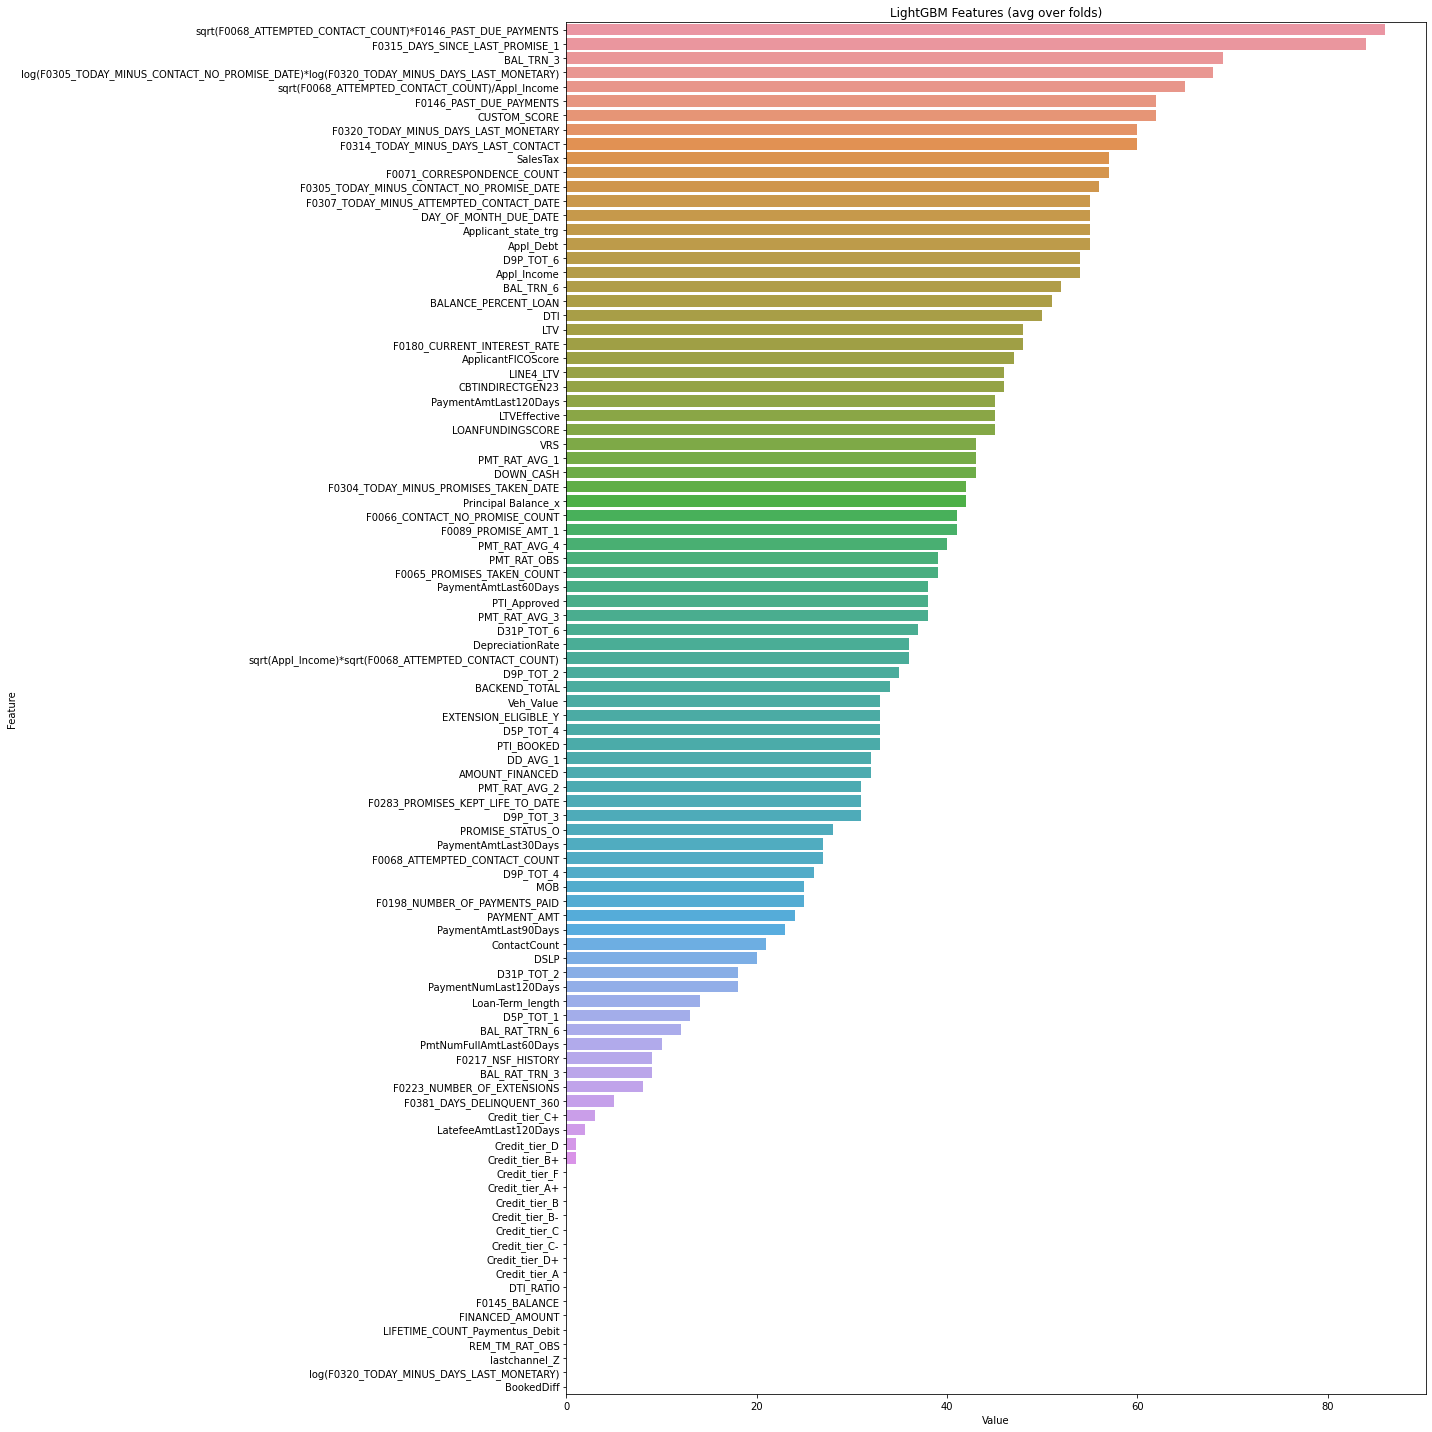

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb_default.feature_importances_,X_train_final.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

### Default XGBoost

In [118]:
import xgboost as xgb
xgb_default = xgb.XGBClassifier()
xgb_default.fit(X_train_final, y_train)

print('XGBoost default performance on train set: {:.5f}'.format(roc_auc_score(y_train, xgb_default.predict_proba(X_train_final)[:, 1])))
print('XGBoost default performance on test set: {:.5f}'.format(roc_auc_score(y_test, xgb_default.predict_proba(X_test_final)[:, 1])))

XGBoost default performance on train set: 0.98135
XGBoost default performance on test set: 0.80801


In [115]:
dill.dump(xgb_default, open("xgb_default.p", "wb"))

In [ ]:
xgb_default = dill.load(open("xgb_default.p", "rb"))

### Default CatBoost

In [119]:
import catboost as cb
cat_default = cb.CatBoostClassifier()
cat_default.fit(X_train_final, y_train)

print('CatBoost default performance on train set: {:.5f}'.format(roc_auc_score(y_train, cat_default.predict_proba(X_train_final)[:,1])))
print('CatBoost default performance on test set: {:.5f}'.format(roc_auc_score(y_test, cat_default.predict_proba(X_test_final)[:,1])))

Learning rate set to 0.04139
0:	learn: 0.6666354	total: 79.8ms	remaining: 1m 19s
1:	learn: 0.6429216	total: 123ms	remaining: 1m 1s
2:	learn: 0.6203884	total: 181ms	remaining: 1m
3:	learn: 0.6004897	total: 234ms	remaining: 58.2s
4:	learn: 0.5825813	total: 284ms	remaining: 56.5s
5:	learn: 0.5667263	total: 322ms	remaining: 53.4s
6:	learn: 0.5511644	total: 358ms	remaining: 50.8s
7:	learn: 0.5378386	total: 413ms	remaining: 51.2s
8:	learn: 0.5267831	total: 462ms	remaining: 50.9s
9:	learn: 0.5161606	total: 512ms	remaining: 50.7s
10:	learn: 0.5055585	total: 563ms	remaining: 50.7s
11:	learn: 0.4963800	total: 610ms	remaining: 50.2s
12:	learn: 0.4887897	total: 647ms	remaining: 49.1s
13:	learn: 0.4811804	total: 695ms	remaining: 49s
14:	learn: 0.4747664	total: 745ms	remaining: 48.9s
15:	learn: 0.4692145	total: 807ms	remaining: 49.7s
16:	learn: 0.4630461	total: 845ms	remaining: 48.9s
17:	learn: 0.4583091	total: 884ms	remaining: 48.2s
18:	learn: 0.4532120	total: 919ms	remaining: 47.4s
19:	learn: 0.44

In [120]:
dill.dump(cat_default, open("cat_default.p", "wb"))

In [ ]:
cat_default = dill.load(open("cat_default.p", "rb"))

# Bayesian Hyperparameter Optimization

## optuna LightGBM

In [25]:
import optuna
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [130]:
from optuna.integration import LightGBMPruningCallback

def objective(trial, X_train_final, y_train):
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X_train_final, y_train)):
        X_train_o, X_test_o = X_train_final.iloc[train_idx], X_train_final.iloc[test_idx]
        y_train_o, y_test_o = y_train[train_idx], y_train[test_idx]

        model = lgb.LGBMClassifier(objective="binary", **param_grid)
        model.fit(
            X_train_o,
            y_train_o,
            eval_set=[(X_test_o, y_test_o)],
            eval_metric="auc",
            early_stopping_rounds=100,
            callbacks=[
                LightGBMPruningCallback(trial, "auc")
            ],  # Add a pruning callback
        )
        preds = model.predict_proba(X_test_o)
        cv_scores[idx] = roc_auc_score(y_test_o, preds[:, 1])

    return np.mean(cv_scores)

In [131]:
%%capture
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_train_final, y_train)
study.optimize(func, n_trials=100)

[I 2022-04-28 21:40:29,295] A new study created in memory with name: LGBM Classifier
[I 2022-04-28 21:40:51,210] Trial 0 finished with value: 0.8153230761066244 and parameters: {'n_estimators': 10000, 'learning_rate': 0.2786062196591043, 'num_leaves': 2320, 'max_depth': 11, 'min_data_in_leaf': 800, 'lambda_l1': 5, 'lambda_l2': 60, 'min_gain_to_split': 4.184861608879479, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 0 with value: 0.8153230761066244.
[I 2022-04-28 21:40:54,047] Trial 1 finished with value: 0.5 and parameters: {'n_estimators': 10000, 'learning_rate': 0.2639879555183171, 'num_leaves': 40, 'max_depth': 11, 'min_data_in_leaf': 9100, 'lambda_l1': 85, 'lambda_l2': 55, 'min_gain_to_split': 9.782277132068298, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 0 with value: 0.8153230761066244.
[I 2022-04-28 21:41:00,619] Trial 2 finished with value: 0.7977096844594107 and parameters: {'n_estimat

In [132]:
print(f"\tBest value (AUC): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (AUC): 0.81985
	Best params:
		n_estimators: 10000
		learning_rate: 0.2131233945776833
		num_leaves: 40
		max_depth: 9
		min_data_in_leaf: 200
		lambda_l1: 0
		lambda_l2: 95
		min_gain_to_split: 2.7190572594492526
		bagging_fraction: 0.7
		bagging_freq: 1
		feature_fraction: 0.5


In [133]:
lgb_optuna = lgb.LGBMClassifier(**study.best_params).fit(X_train_final, y_train)
print('LightGBM best performance on train set: {:.5f}'.format(roc_auc_score(y_train, lgb_optuna.predict_proba(X_train_final)[:,1])))
print('LightGBM best performance on test set: {:.5f}'.format(roc_auc_score(y_test, lgb_optuna.predict_proba(X_test_final)[:,1])))

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=2.7190572594492526, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.7190572594492526
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=95, reg_lambda=0.0 will be ignored. Current value: lambda_l2=95
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM best performance on train set: 0.90586
LightGBM best performance on test set: 0.80674


In [41]:
study.best_params

{'n_estimators': 10000,
 'learning_rate': 0.19426827218190934,
 'num_leaves': 2360,
 'max_depth': 7,
 'min_data_in_leaf': 5300,
 'lambda_l1': 90,
 'lambda_l2': 60,
 'min_gain_to_split': 9.168537190385951,
 'bagging_fraction': 0.30000000000000004,
 'bagging_freq': 1,
 'feature_fraction': 0.30000000000000004}

In [85]:
dill.dump(lgb_optuna, open('lgb_optuna.pkl', 'wb'))

In [ ]:
lgb_optuna = dill.load(open('lgb_optuna.pkl', 'rb'))

## optuna XGBoost

In [95]:
import optuna
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from optuna.integration import XGBoostPruningCallback

In [98]:
def objective(trial, X_train_final, y_train):
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "gamma": trial.suggest_int("gamma", 1, 15),
        "n_estimators": trial.suggest_int("n_estimators", 500 , 10000, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "alpha": trial.suggest_loguniform("lambda", 1e-8, 100.0),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 100.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 0, 20),
        'eval_metric':"auc",
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X_train_final, y_train)):
        X_train_o, X_test_o = X_train_final.iloc[train_idx], X_train_final.iloc[test_idx]
        y_train_o, y_test_o = y_train[train_idx], y_train[test_idx]

        model = xgb.XGBClassifier(objective="binary:logistic", **param_grid)
        model.fit(
            X_train_o,
            y_train_o,
            eval_set=[(X_test_o, y_test_o)],
            early_stopping_rounds=100,
            #callbacks=[XGBoostPruningCallback(trial, "validation-auc")],  # Add a pruning callback
        )
        preds = model.predict_proba(X_test_o)
        cv_scores[idx] = roc_auc_score(y_test_o, preds[:, 1])

    return np.mean(cv_scores)

In [99]:
%%capture
study = optuna.create_study(direction="maximize", study_name="XGBoost Classifier")
func = lambda trial: objective(trial, X_train_final, y_train)
study.optimize(func, n_trials=2)

[I 2022-04-28 19:59:14,829] A new study created in memory with name: XGBoost Classifier
[I 2022-04-28 20:01:31,302] Trial 0 finished with value: 0.8173910892852791 and parameters: {'gamma': 2, 'n_estimators': 8000, 'learning_rate': 0.3661065535446032, 'max_depth': 8, 'lambda': 11.375169110236824, 'min_child_weight': 5}. Best is trial 0 with value: 0.8173910892852791.
[I 2022-04-28 20:03:06,363] Trial 1 finished with value: 0.8168426290184702 and parameters: {'gamma': 5, 'n_estimators': 9900, 'learning_rate': 0.3255339655727209, 'max_depth': 6, 'lambda': 0.00033089542471768615, 'min_child_weight': 17}. Best is trial 0 with value: 0.8173910892852791.


In [122]:
xgb_optuna = xgb.XGBClassifier(**study.best_params).fit(X_train_final, y_train)
print('LightGBM best performance on train set: {:.5f}'.format(roc_auc_score(y_train, xgb_optuna.predict_proba(X_train_final)[:,1])))
print('LightGBM best performance on test set: {:.5f}'.format(roc_auc_score(y_test, xgb_optuna.predict_proba(X_test_final)[:,1])))

KeyboardInterrupt: 

# Stacking

In [28]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [32]:
lgb_optuna = dill.load(open('lgb_optuna.pkl', 'rb'))
lgb_default = dill.load(open('lgb_default.p', 'rb'))
cat_default = dill.load(open('cat_default.p', 'rb'))
xgb_default = dill.load(open('xgb_default.p', 'rb'))
xgb_grid1 = dill.load(open('gsearch1.pkl', 'rb'))
xgb_grid2 = dill.load(open('gsearch2.pkl', 'rb'))

In [33]:
%%time
level0 = [('lgb_optuna', lgb_optuna),
          ('lgb_default', lgb_default),
          ('cat_default', cat_default),
          ('xgb_default', xgb_default),
          ('xgb_grid1', xgb_grid1),
          ('xgb_grid2', xgb_grid2)]

level1 = LogisticRegression()

stc_class = StackingClassifier(estimators=level0,
                             final_estimator=level1,
                             cv=5,
                             n_jobs=-1)

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
%%time
stc_class.fit(X_train_final, y_final)
print('StackingClassifier best performance on train set: {:.5f}'.format(roc_auc_score(y_train, stc_class.predict_proba(X_train_final)[:, 1])))
print('StackingClassifier best performance on test set: {:.5f}'.format(roc_auc_score(y_test, stc_class.predict_proba(X_test_final)[:, 1])))

In [ ]:
dill.dump(stc_class, open('stclass.pkl', 'wb'))

In [ ]:
stc_class = dill.load(open('stclass.pkl', 'rb'))

# Test

First the data should be loaded. We assumed that they have the same name as the original data and they are stored in the test folder.
All the other objects that we have made shhould be saved in the folder that our notebook is going to be runned.
We have used the following libraries that should be installed, for python 3.10:
miceforest library requires visual studio and C++ compiler installed on windows.
Now that we are finished with project we are questionning whether it was wise to use so many libraries, hopefully it does not lead to any compatibility issues.


In [ ]:
#!pip install numpy
#!pip install pandas
#!pip install sklearn
#!pip install category_encoders
#!pip install joblib
#!pip install dill
#!pip3 install miceforest --no-cache-dir
#!pip install autofeat
#!pip install openpyxl
#!pip install catboost
#!pip install xgboost

In [12]:
!pip install autofeat

  Using cached autofeat-2.0.10-py3-none-any.whl (24 kB)
  Using cached Pint-0.19.2.tar.gz (292 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached sympy-1.10.1-py3-none-any.whl (6.4 MB)
  Using cached mpmath-1.2.1-py3-none-any.whl (532 kB)
  Created wheel for pint: filename=Pint-0.19.2-py3-none-any.whl size=231034 sha256=e3d583d7ab53dfd256b7865ca63f958131469d1bb93078b6d2112c6641565694
  Stored in directory: c:\users\axb190032\appdata\local\pip\cache\wheels\98\1d\e0\a44541f5302ac50028a3be0db9417c18092c61f25009d62145
Successfully built pint


In [42]:
!pip install catboost

  Using cached plotly-5.7.0-py2.py3-none-any.whl (28.8 MB)
  Using cached graphviz-0.20-py3-none-any.whl (46 kB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [ ]:
!pip install xgboost

In [43]:
# clean the test data
import numpy as np
import pandas as pd
import sklearn
import category_encoders as ce
import joblib
import dill
import miceforest
import autofeat
import openpyxl
import catboost
import xgboost
import lightgbm



## UTD_Data
names1 = pd.read_excel('./test/Data dictionary for UTD dataset.xlsx', sheet_name='Main Data')
name1 = names1['Column Field'].tolist()
test_Data = pd.read_csv('./test/UTD_Data_1.csv',names=name1)
test_Data = test_Data.astype({"PullDate": 'datetime64[ns]'})
test_Data = test_Data.astype({"F0385_LAST_NSF_DATE": 'datetime64[ns]'})
test_Data = test_Data.astype({"booked_yr_mo": str})
test_Data['booked_yr_mo']=test_Data['booked_yr_mo'].str[:4] + '-' + test_Data['booked_yr_mo'].str[4:] + '-01'
test_Data = test_Data.astype({"booked_yr_mo": 'datetime64[ns]'})
test_Data.rename(columns={'masked_account': 'Masked_Account'}, inplace=True)

## UTD_DPD
names2 = pd.read_excel('./test/Data dictionary for UTD dataset.xlsx', sheet_name='UTD_DPD', header=None)
name2 = names2.iloc[:,0].tolist()
test_DPD = pd.read_csv('./test/UTD_DPD.csv',names=name2)
test_DPD = test_DPD.astype({"Business_Date": 'datetime64[ns]'})

test_DPD_1_first= pd.DataFrame(test_DPD[test_DPD["DPD"]==1].groupby("Masked_Account").agg({"Business_Date": "min" , "Principal Balance": "first"})).reset_index()
MA_1  = test_DPD_1_first['Masked_Account'].unique()
test_DPD_1 = test_DPD[test_DPD["Masked_Account"].isin(MA_1)]
test_DPD_1_merge = pd.merge(test_DPD_1, test_DPD_1, on='Masked_Account', how='left')
test_DPD_1_merge['difference']= (test_DPD_1_merge['Business_Date_y'] - test_DPD_1_merge['Business_Date_x']).dt.days
test_DPD_target = test_DPD_1_merge[(test_DPD_1_merge['DPD_x']==1) & (test_DPD_1_merge['difference']==29)].copy()
def target_value(x):
    if x > 30:
        return np.NaN # There is probably a mistake in the dataset
    elif x == 30:
        return 1 # This is the target
    else:
        return 0 # if there is something less than -30 there is still the possiblity of mistake but as we are not sure, we leave it as 0

test_DPD_target['target'] = test_DPD_target['DPD_y'].apply(target_value)
test_DPD_target.dropna(inplace=True)
test_DPD_target.drop(['Business_Date_y', 'DPD_x', 'DPD_y' , 'Principal Balance_y' , 'difference'], axis=1, inplace=True)
test_DPD_target_s = test_DPD_target.groupby('Masked_Account').sample(n=1).copy()

## UTD_Orig
names3 = pd.read_excel('./test/Data dictionary for UTD dataset.xlsx', sheet_name='UTD_Orig_Data -Supplement data')
name3 = names3['Column Field'].tolist()
test_Orig_Data = pd.read_csv('./test/UTD_Orig_Data.csv', names = name3)
test_Orig_Data.drop(test_Orig_Data.index[0], inplace = True)
test_Orig_Data = test_Orig_Data.iloc[:,0].str.split('	', expand=True)
test_Orig_Data.columns = name3
test_Orig_Data = test_Orig_Data.astype({"Masked_account ": str})
test_Orig_Data = test_Orig_Data.astype({"Applicant_state": str})
test_Orig_Data = test_Orig_Data.astype({"Credit_tier": str})
test_Orig_Data = test_Orig_Data.astype({"Loan-Term_length": int})
test_Orig_Data = test_Orig_Data.astype({"PAYMENT_AMT": float})
test_Orig_Data.reset_index(inplace = True, drop = True)
test_Orig_Data.columns = ['Masked_Account', 'Applicant_state', 'Credit_tier', 'Loan-Term_length','PAYMENT_AMT']
# merge the test data
df = pd.merge(test_DPD_target_s, test_Data, left_on=['Masked_Account','Business_Date_x'], right_on = ['Masked_Account','PullDate'], how="inner")
df = pd.merge(df, test_Orig_Data, on = "Masked_Account", how="left")
df.set_index(['Masked_Account'] , inplace = True)
df['BookedDiff']=((df.Business_Date_x.dt.year - df.booked_yr_mo.dt.year) * 12) +(df.Business_Date_x.dt.month - df.booked_yr_mo.dt.month)
df.drop(columns=['booked_yr_mo', 'PullDate' , 'Business_Date_x'], inplace = True)
df.drop(['DSL_NSF', 'F0385_LAST_NSF_DATE','CBTINDIRECTGEN30','INQ12_5', 'DSL_ext', 'F0306_TODAY_MINUS_LEFT_MESSAGES_DATE' , 'F0317_DAYS_SINCE_LAST_LETTER' ], axis = 1, inplace = True)

y=df['target']
dill.dump(y, open('target_y.pkl', 'wb'))
df = df.drop(['target'], axis = 1)
#category encode
from sklearn.preprocessing import OneHotEncoder
from category_encoders import WOEEncoder
from copy import deepcopy
import joblib

#Columns to drop from ML models
cols_to_drop = []
#Categorical encoders disctionary
cat_encoders = {}
#New categorical (encoded) columns
cat_enc_columns = []

for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].nunique() < 20:
            enc = joblib.load(col+ '_enc.joblib')
            enc.transform(df[[col]])
            result = enc.transform(df[[col]])
            ohe_columns = [col+"_"+str(x) for x in enc.categories_[0]]
            cat_enc_columns = cat_enc_columns + ohe_columns
            result_train = pd.DataFrame(result, columns=ohe_columns , index=df.index)
            df = pd.concat([df, result_train.reindex(df.index)], axis=1 , join='inner')
        else:
            enc = dill.load(open(col+'_trg_'+'pre_processing.p', "rb"))
            new_col_name = col+"_trg"
            df[new_col_name] = enc.transform(df[[col]])
            cat_encoders[col] = [deepcopy(enc),"trg"]
            cat_enc_columns.append(new_col_name)

        cols_to_drop.append(col)

cols_to_drop = ['Applicant_state', 'Credit_tier']

df.drop(columns=cols_to_drop, inplace = True)
# impute
kernel = dill.load(open('kernel.p', 'rb'))
df_imp = kernel.impute_new_data(df).complete_data(0)
# Feature Engineering
auto_feat = dill.load(open('auto_feat.p', 'rb'))
df_eng =auto_feat.transform(df_imp.loc[:,['F0146_PAST_DUE_PAYMENTS',
                                                'F0068_ATTEMPTED_CONTACT_COUNT',
                                                'F0315_DAYS_SINCE_LAST_PROMISE_1',
                                                'F0305_TODAY_MINUS_CONTACT_NO_PROMISE_DATE',
                                                'F0320_TODAY_MINUS_DAYS_LAST_MONETARY',
                                                'Appl_Income']])

df_eng.set_index(df_imp.index, inplace=True)

df_eng.drop(['F0146_PAST_DUE_PAYMENTS',
               'F0068_ATTEMPTED_CONTACT_COUNT',
               'F0315_DAYS_SINCE_LAST_PROMISE_1',
               'F0305_TODAY_MINUS_CONTACT_NO_PROMISE_DATE',
               'F0320_TODAY_MINUS_DAYS_LAST_MONETARY',
               'Appl_Income'], axis=1, inplace=True)
# final prepared file
df_final = pd.concat([df_imp, df_eng], axis=1)
dill.dump(df_final, open('df_final.p', 'wb'))
from sklearn.metrics import roc_auc_score
stc_class = dill.load(open('stclass.pkl', 'rb'))
print('Our final Classifier AUC score on OOT set: {:.8f}'.format(roc_auc_score(y, stc_class.predict_proba(df_final)[:, 1])))

Our final Classifier AUC score on OOT set: 0.87233398


In [36]:
pickle.load(open('kernel.p', 'rb'))

AttributeError: Can't get attribute '_unpickle_block' on <module 'pandas._libs.internals' from 'C:\\jupyterL\\lib\\site-packages\\pandas\\_libs\\internals.cp38-win_amd64.pyd'>

In [33]:
auto_feat = dill.load(open('auto_feat.p', 'rb'))

In [18]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [28]:
!pip install pandas

In [19]:
!pip freeze | findstr numpy

numpy @ file:///D:/bld/numpy_1629092230867/work


In [20]:
!pip freeze | findstr pandas

pandas @ file:///D:/bld/pandas_1631466259165/work


In [44]:
!pip show pandas

Name: pandas
Version: 1.3.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\jupyterl\lib\site-packages
Requires: python-dateutil, numpy, pytz
Required-by: statsmodels, shap, seaborn, category-encoders, catboost, autofeat


In [21]:
!pip freeze | findstr sklearn

sklearn==0.0


In [32]:
!pip freeze | findstr pickle

cloudpickle==2.0.0
pickleshare @ file:///home/conda/feedstock_root/build_artifacts/pickleshare_1602536217715/work


In [23]:
!pip freeze | findstr dill

dill==0.3.4


In [25]:
!pip freeze | findstr joblib

joblib==1.1.0


In [26]:
!pip freeze | findstr miceforest

miceforest==5.4.0


In [6]:
# clean the test data
import numpy as np
import pandas as pd
import sklearn
import category_encoders as ce
import joblib
import dill
import miceforest
#import autofeat
import openpyxl



## UTD_Data
names1 = pd.read_excel('./test/Data dictionary for UTD dataset.xlsx', sheet_name='Main Data')
name1 = names1['Column Field'].tolist()
test_Data = pd.read_csv('./test/UTD_Data_1.csv',names=name1)
test_Data = test_Data.astype({"PullDate": 'datetime64[ns]'})
test_Data = test_Data.astype({"F0385_LAST_NSF_DATE": 'datetime64[ns]'})
test_Data = test_Data.astype({"booked_yr_mo": str})
test_Data['booked_yr_mo']=test_Data['booked_yr_mo'].str[:4] + '-' + test_Data['booked_yr_mo'].str[4:] + '-01'
test_Data = test_Data.astype({"booked_yr_mo": 'datetime64[ns]'})
test_Data.rename(columns={'masked_account': 'Masked_Account'}, inplace=True)

## UTD_DPD
names2 = pd.read_excel('./test/Data dictionary for UTD dataset.xlsx', sheet_name='UTD_DPD', header=None)
name2 = names2.iloc[:,0].tolist()
test_DPD = pd.read_csv('./test/UTD_DPD.csv',names=name2)
test_DPD = test_DPD.astype({"Business_Date": 'datetime64[ns]'})

test_DPD_1_first= pd.DataFrame(test_DPD[test_DPD["DPD"]==1].groupby("Masked_Account").agg({"Business_Date": "min" , "Principal Balance": "first"})).reset_index()
MA_1  = test_DPD_1_first['Masked_Account'].unique()
test_DPD_1 = test_DPD[test_DPD["Masked_Account"].isin(MA_1)]
test_DPD_1_merge = pd.merge(test_DPD_1, test_DPD_1, on='Masked_Account', how='left')
test_DPD_1_merge['difference']= (test_DPD_1_merge['Business_Date_y'] - test_DPD_1_merge['Business_Date_x']).dt.days
test_DPD_target = test_DPD_1_merge[(test_DPD_1_merge['DPD_x']==1) & (test_DPD_1_merge['difference']==29)].copy()
def target_value(x):
    if x > 30:
        return np.NaN # There is probably a mistake in the dataset
    elif x == 30:
        return 1 # This is the target
    else:
        return 0 # if there is something less than -30 there is still the possiblity of mistake but as we are not sure, we leave it as 0

test_DPD_target['target'] = test_DPD_target['DPD_y'].apply(target_value)
test_DPD_target.dropna(inplace=True)
test_DPD_target.drop(['Business_Date_y', 'DPD_x', 'DPD_y' , 'Principal Balance_y' , 'difference'], axis=1, inplace=True)
test_DPD_target_s = test_DPD_target.groupby('Masked_Account').sample(n=1).copy()

## UTD_Orig
names3 = pd.read_excel('./test/Data dictionary for UTD dataset.xlsx', sheet_name='UTD_Orig_Data -Supplement data')
name3 = names3['Column Field'].tolist()
test_Orig_Data = pd.read_csv('./test/UTD_Orig_Data.csv', names = name3)
test_Orig_Data.drop(test_Orig_Data.index[0], inplace = True)
test_Orig_Data = test_Orig_Data.iloc[:,0].str.split('	', expand=True)
test_Orig_Data.columns = name3
test_Orig_Data = test_Orig_Data.astype({"Masked_account ": str})
test_Orig_Data = test_Orig_Data.astype({"Applicant_state": str})
test_Orig_Data = test_Orig_Data.astype({"Credit_tier": str})
test_Orig_Data = test_Orig_Data.astype({"Loan-Term_length": int})
test_Orig_Data = test_Orig_Data.astype({"PAYMENT_AMT": float})
test_Orig_Data.reset_index(inplace = True, drop = True)
test_Orig_Data.columns = ['Masked_Account', 'Applicant_state', 'Credit_tier', 'Loan-Term_length','PAYMENT_AMT']
# merge the test data
df = pd.merge(test_DPD_target_s, test_Data, left_on=['Masked_Account','Business_Date_x'], right_on = ['Masked_Account','PullDate'], how="inner")
df = pd.merge(df, test_Orig_Data, on = "Masked_Account", how="left")
df.set_index(['Masked_Account'] , inplace = True)
df['BookedDiff']=((df.Business_Date_x.dt.year - df.booked_yr_mo.dt.year) * 12) +(df.Business_Date_x.dt.month - df.booked_yr_mo.dt.month)
df.drop(columns=['booked_yr_mo', 'PullDate' , 'Business_Date_x'], inplace = True)
df.drop(['DSL_NSF', 'F0385_LAST_NSF_DATE','CBTINDIRECTGEN30','INQ12_5', 'DSL_ext', 'F0306_TODAY_MINUS_LEFT_MESSAGES_DATE' , 'F0317_DAYS_SINCE_LAST_LETTER' ], axis = 1, inplace = True)

y=df['target']
dill.dump(y, open('target_y.pkl', 'wb'))
df = df.drop(['target'], axis = 1)
#category encode
from sklearn.preprocessing import OneHotEncoder
from category_encoders import WOEEncoder
from copy import deepcopy
import joblib

#Columns to drop from ML models
cols_to_drop = []
#Categorical encoders disctionary
cat_encoders = {}
#New categorical (encoded) columns
cat_enc_columns = []

for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].nunique() < 20:
            enc = joblib.load(col+ '_enc.joblib')
            enc.transform(df[[col]])
            result = enc.transform(df[[col]])
            ohe_columns = [col+"_"+str(x) for x in enc.categories_[0]]
            cat_enc_columns = cat_enc_columns + ohe_columns
            result_train = pd.DataFrame(result, columns=ohe_columns , index=df.index)
            df = pd.concat([df, result_train.reindex(df.index)], axis=1 , join='inner')
        else:
            enc = dill.load(open(col+'_trg_'+'pre_processing.p', "rb"))
            new_col_name = col+"_trg"
            df[new_col_name] = enc.transform(df[[col]])
            cat_encoders[col] = [deepcopy(enc),"trg"]
            cat_enc_columns.append(new_col_name)

        cols_to_drop.append(col)

cols_to_drop = ['Applicant_state', 'Credit_tier']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34624 entries, 0x0000892A3160BBCC4BDFC8F29945E683ADC3AC16CE13D66C272B70AEBA08B8E3 to 0xFFFC9A8709407BABDC5293E8DDB84972BEC52E8C57D09A7AD290BA954433C48B
Data columns (total 93 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Principal Balance_x                        34624 non-null  float64
 1   Veh_Value                                  34624 non-null  int64  
 2   ApplicantFICOScore                         34624 non-null  int64  
 3   DTI                                        34624 non-null  float64
 4   LTV                                        34624 non-null  float64
 5   PTI_BOOKED                                 34624 non-null  float64
 6   SalesTax                                   34624 non-null  float64
 7   AMOUNT_FINANCED                            34624 non-null  float64
 8   Appl_Debt                                  34

In [9]:
df.drop(columns=cols_to_drop, inplace = True)
# impute

KeyError: "['Applicant_state' 'Credit_tier'] not found in axis"

In [10]:
kernel = pickle.load(open('kernel.p', 'rb'))
df_imp = kernel.impute_new_data(df).complete_data(0)

AttributeError: Can't get attribute '_unpickle_block' on <module 'pandas._libs.internals' from 'C:\\jupyterL\\lib\\site-packages\\pandas\\_libs\\internals.cp38-win_amd64.pyd'>